<h1 style="color:green;">Title of ML Project: Dry Bean Class Prediction Model</h1>

**Name: Neethu Mathew**

**Organization: Entri Elevate**

1. **Overview of Problem Statement:**

The analysis of the Dry Bean Dataset is important not only for its direct applications in agriculture but also as a tool for advancing the fields of machine learning, pattern recognition, and automated classification systems. It supports the development of more efficient, automated agricultural systems and contributes to data-driven decision-making in crop production and quality control.

2. **Objective:**

The objective of the Dry Bean Dataset is to classify different types of dry beans based on their physical and geometrical properties to improve accuracy in automated sorting, grading, and quality control processes in agriculture

3. **Data Description:**

- Source: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

   The Dry Bean Dataset is sourced from the UCI Machine Learning Repository, a well-known collection of datasets for machine learning research and development. The dataset was created as part of a study aimed at classifying different types of dry beans based on their physical and geometrical properties using image processing techniques.


- Features:
  
   Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

1. Area - (A), Refers to the total number of pixels that represent a bean in an image.
2. Perimeter - (P), Bean circumference is defined as the length of its border.
3. MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
4. MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. AspectRatio - (K), Defines the relationship between L and l :K = L/l
6. Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region
7. ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area: Ed=  √(4Aπ)
9. Extent - (Ex), The ratio of the pixels in the bounding box to the bean area Ex = A / AB  where AB = Area of bounding rectangle.
10.  Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans: S= A/C
11.  Roundness - (R), Calculated with the following formula: R = 4πA / P<sup>2</sup>
12.  Compactness - (CO), Measures the roundness of an object: CO = E<sub>d</sub> / L
13.  ShapeFactor1 - (SF1) calculated with the following formula: SF1 = L / A
14.  ShapeFactor2 - (SF2) Calculated with the following formula: SF2 = l/A
15.  ShapeFactor3 - (SF3) Calculated with the following formula: SF3 = A/((L/2.L/2.π))
16.  ShapeFactor4 - (SF4) Calculated with the following formula: SF4 = A/((L/2.l/2.π))
17.  Class - Target Variable consist of 7 different types of Dry beans namely BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

- The general features of the specified dry beans are as follows:

- Barbunya: Beige-colored background with red stripes or variegated, speckled color, its seeds are large, physical shape is oval close to the round.

- Bombay: It is white in color, its seeds are very big and its physical structure is oval and bulging.

- Cali: It is white in color, its seeds are slightly plump and slightly larger than dry beans and in shape of kidney.

- Dermason: This type of dry beans, which are fuller flat, is white in color and one end is round and the other ends are round.

- Horoz: Dry beans of this type are long, cylindrical, white in color and generally medium in size.

- Seker: Large seeds, white in color, physical shape is round.

- Sira: Its seeds are small, white in color, physical structure is flat, one end is flat, and the other end is round.

4. **Data Collection:**

Data has already been provided and imported. Next, we gained insights into the data distribution and patterns through initial checks and will continue with further analysis.

4. **Exploratory Data Analysis:**

- Importing  Libraries

In [84]:
#Basic Libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from scipy.stats import rankdata, norm
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [5]:
# Load the dataset
Bean_df = pd.read_csv("Dry_Bean_Dataset new.csv")

In [6]:
Bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [10]:
Bean_df.shape

(13611, 17)

In [7]:
Bean_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [8]:
Bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
Bean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


The features vary greatly in scales, scaling maybe required.

In [14]:
Bean_df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [23]:
# Find and display all duplicated rows in the Dry Bean Dataset
duplicated_rows = Bean_df[Bean_df.duplicated(keep=False)]
print("Duplicated rows in Dry Bean Dataset:")
print(duplicated_rows)

Duplicated rows in Dry Bean Dataset:
       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
5504  33518    702.956       277.571399       154.305581      1.798842   
5505  33518    702.956       277.571399       154.305581      1.798842   
5508  33954    716.750       277.368480       156.356326      1.773951   
5509  33954    716.750       277.368480       156.356326      1.773951   
5547  38427    756.323       306.533886       160.591784      1.908777   
...     ...        ...              ...              ...           ...   
7285  63948    996.497       412.297178       198.877557      2.073121   
7339  65766   1035.842       406.416622       207.242369      1.961069   
7340  65766   1035.842       406.416622       207.242369      1.961069   
7341  65781   1039.257       409.713859       204.992832      1.998674   
7342  65781   1039.257       409.713859       204.992832      1.998674   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundne

In [11]:
#find out the distribution of Target 
Bean_df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

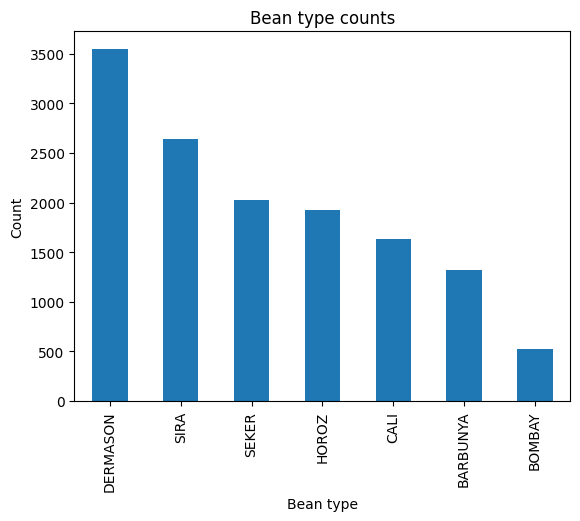

In [12]:
Bean_df["Class"].value_counts().plot(kind='bar',
                                   title= "Bean type counts",
                                   xlabel= 'Bean type',
                                   ylabel= 'Count');

-> There's an imbalance between the count of each class.
     
-> Dermason is the most frequent class. (2837)

-> Bombay is the least frequent class. (418)

Univariate Analysis:

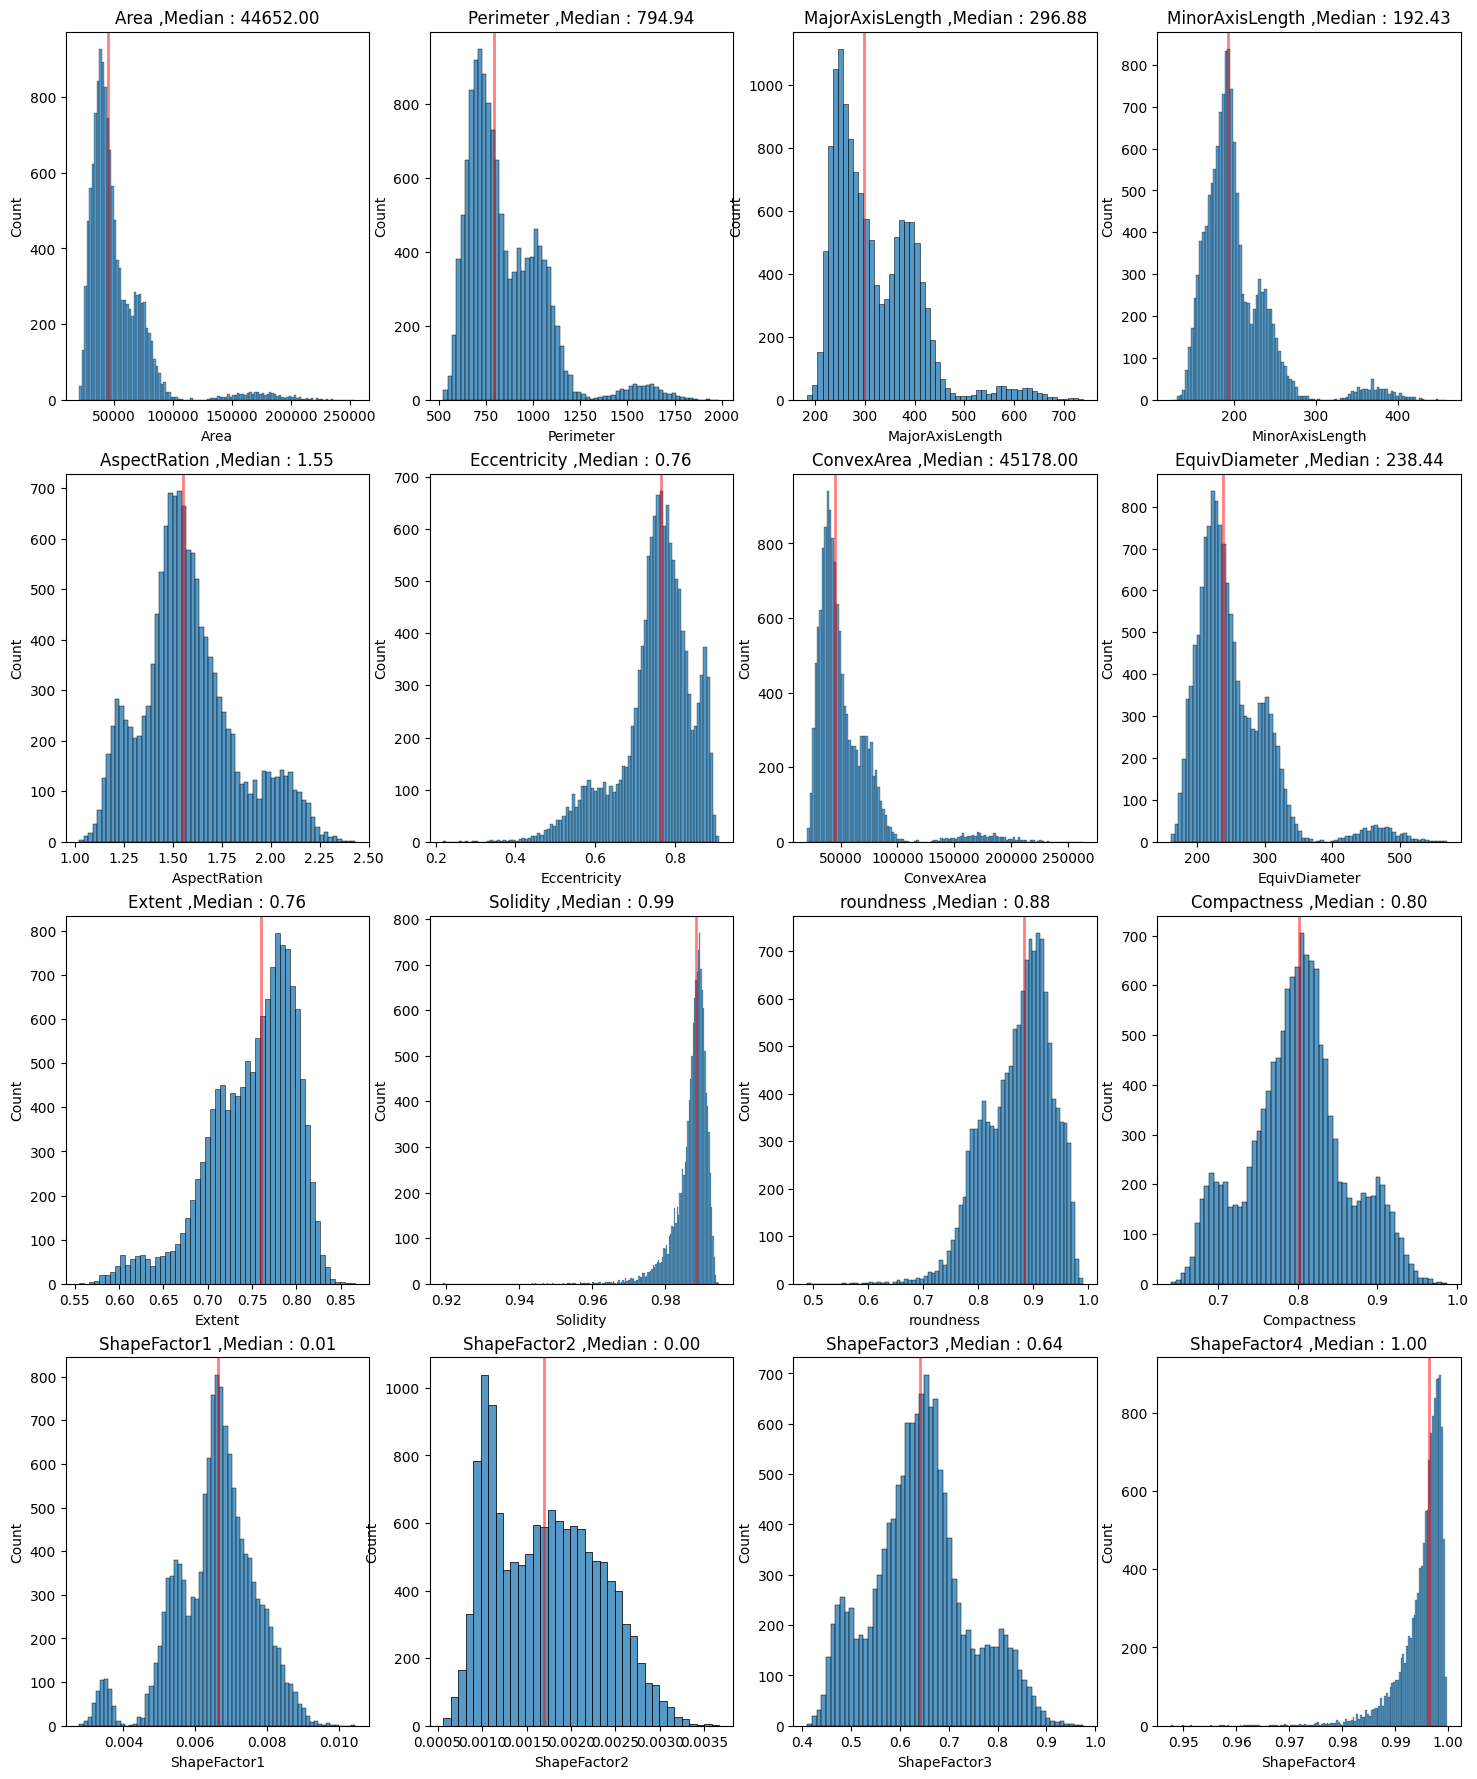

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(18, 22))
for feature, ax in zip(Bean_df.columns.drop("Class"), axes.flatten()):
    sns.histplot(data=Bean_df[feature],ax=ax)
    median = Bean_df[feature].median()
    ax.set_title( f'{feature} ,Median : {median:0.2f}')
    ax.axvline(median,
               color ='red', 
               lw=2, 
               alpha=0.5)
plt.show()

-> It is clear that some features have long tails in their distribution.

-> Some features, Solidity and Shapefactor 4, Eccentricity, roundness are rightly skewed. Some of them are left skewed and rest of them are not skewed but shows multimode.

-> We should investegate the distribution of each feature with respect to the classes of the dry beans.

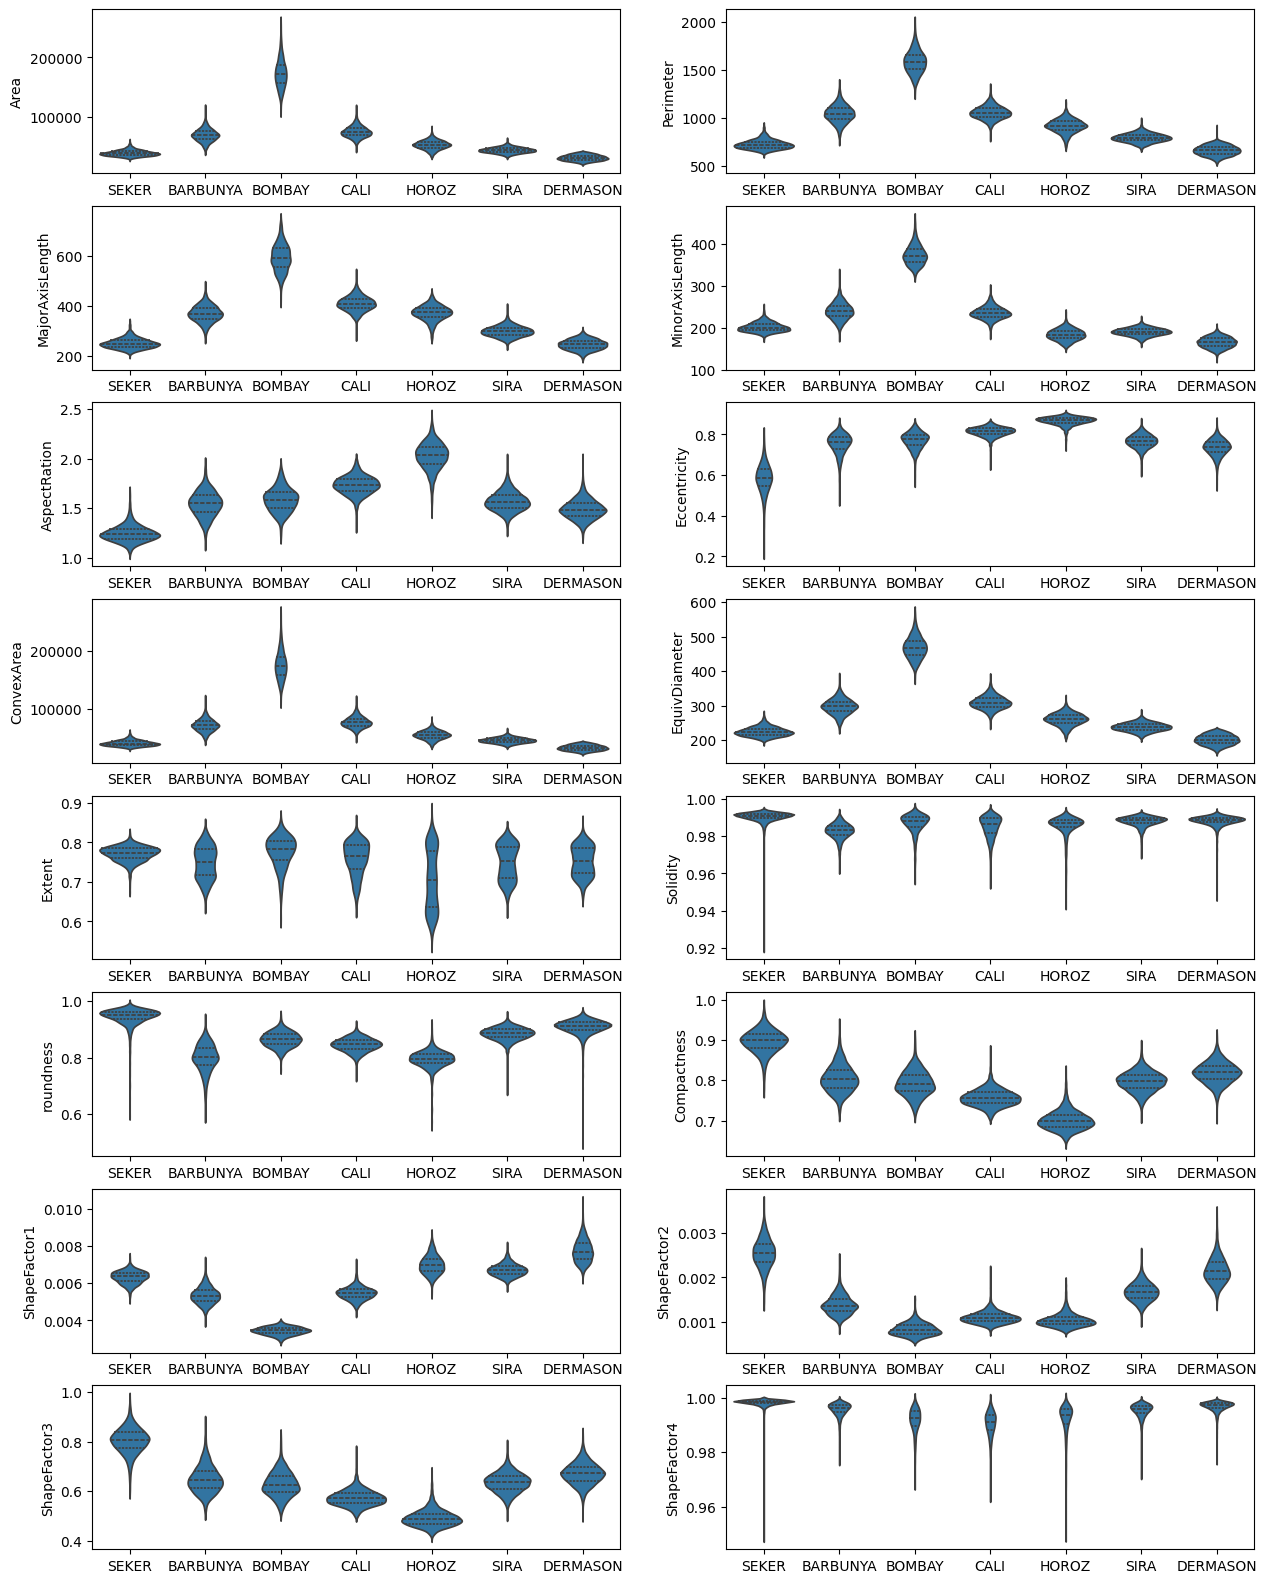

In [24]:
#To visualize the distribution of each feature for different classes of beans in the Dry Bean Dataset.
fig, axes = plt.subplots(8, 2, figsize = (15, 20))
for feature, ax in zip(Bean_df.columns.drop("Class"), axes.flatten()):
    sns.violinplot(data=Bean_df,
                   x="Class",
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

->  Some features have a very skewed distribution with long tails (eccentricity, solidity, roundness, shape factor4).

-> Bombay class differs greatly from other classes, it has a larger area and perimeter, and can be clearly distinguished from other classes based on Minor Axis Length (>310) and Shape Factor 1 (<0.0041).

-> Both Barbunya class and Cali class have similar distributions and values in many features (area, equivalent diameter, shape factor1), which may lead to mislabeling  as the other.

-> Dermason class is similar to Seker class in some features, and Sira class in other features.

Bivariate Analysis

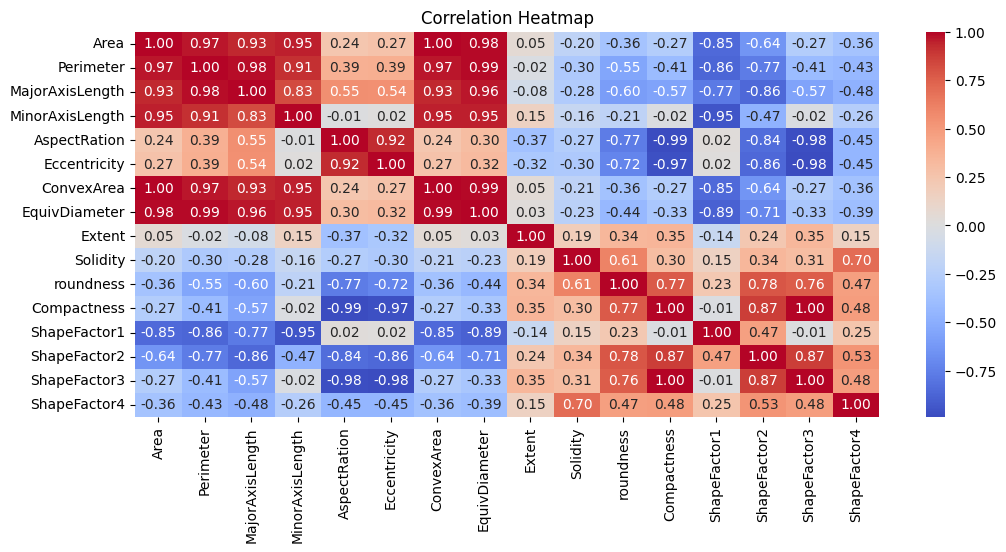

In [37]:
# Exclude non-numeric columns, such as 'Class'
numeric_data = Bean_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

-> There are high multicollinearity between the features Area, perimeter, Major and Mainor Axislength, ConvexArea, Equivdiameter, AspectRation, Eccentricity, Shapefactor3, Shapefactor1 and Compactness.

-> So, we have to do the PCA Tehnique to reduce the multicollinearity.

5. **Data Preprocessing: Data Cleaning**

1. Removing the duplicated values.
    There are 68 rows are duplicated values and we have to remove those values.

In [38]:
# Remove duplicates
Bean_Df_Dup = Bean_df.drop_duplicates()

# Check the shape of the cleaned data
print(f"Shape of the dataset after removing duplicates: {Bean_Df_Dup.shape}")


Shape of the dataset after removing duplicates: (13543, 17)


2. Checking and treating the outliers

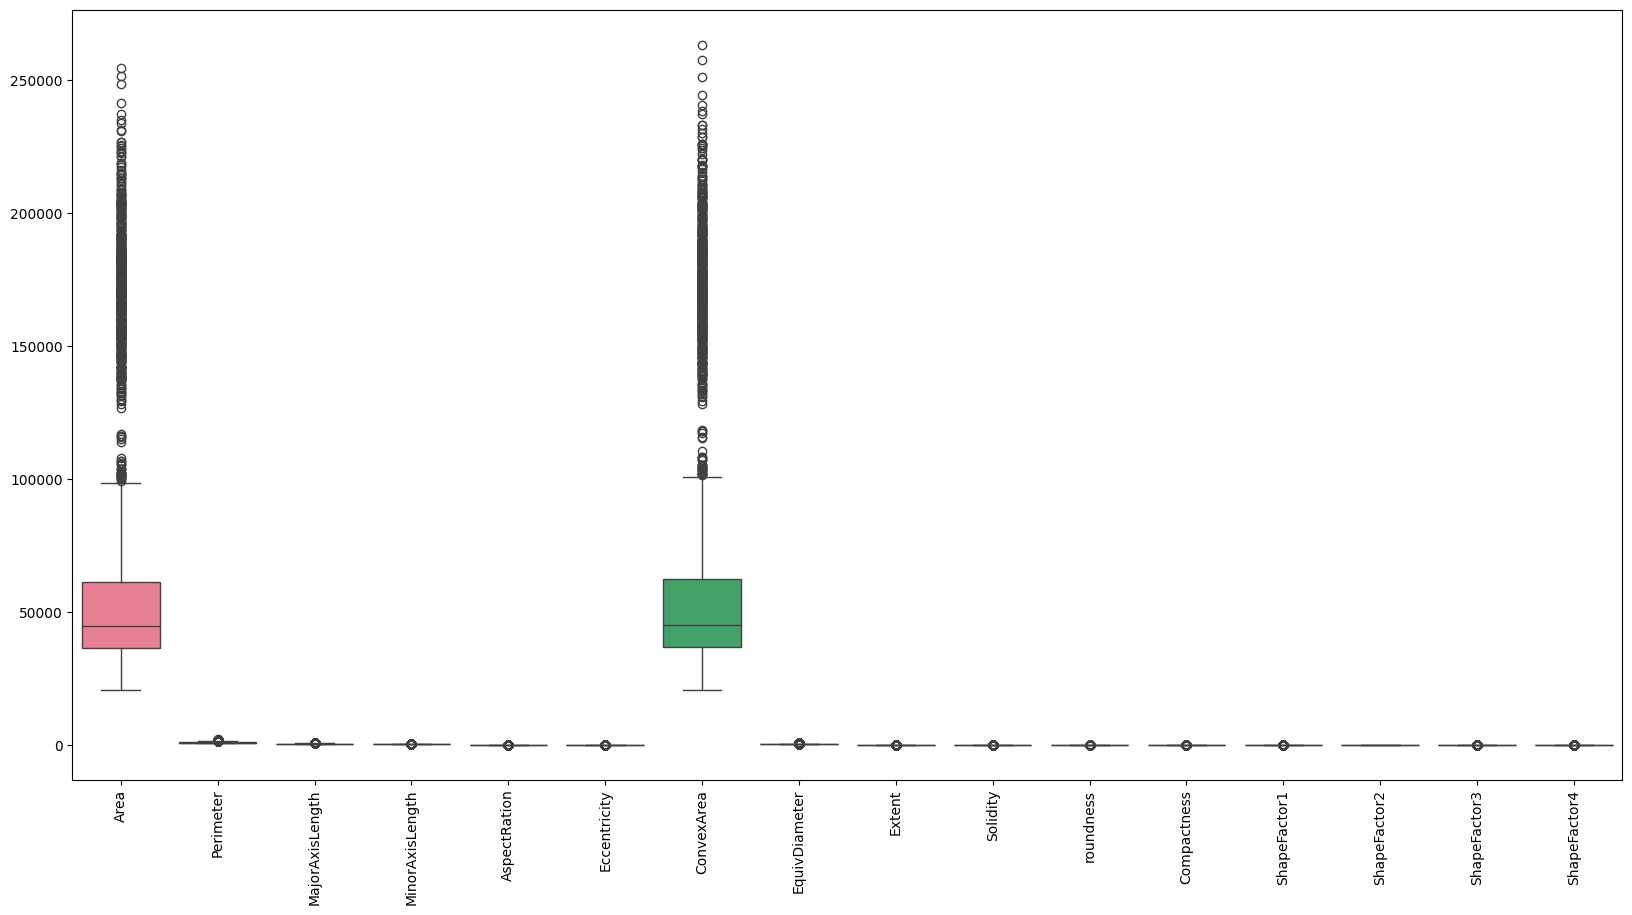

In [39]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = Bean_Df_Dup.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

In [40]:
def count_outliers_iqr(df):
    outlier_count = 0  # Initialize counter for total outliers

    for col in df.columns:
        if df[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            num_outliers = outliers.shape[0]
            outlier_count += num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    return outlier_count

# Exclude the target column 'Class' while checking for outliers
total_outliers = count_outliers_iqr(Bean_Df_Dup.drop(columns='Class'))

print(f"\nTotal number of outliers in the dataset: {total_outliers}")

Feature: Area | Outliers: 551
Feature: Perimeter | Outliers: 500
Feature: MajorAxisLength | Outliers: 379
Feature: MinorAxisLength | Outliers: 567
Feature: AspectRation | Outliers: 485
Feature: Eccentricity | Outliers: 833
Feature: ConvexArea | Outliers: 549
Feature: EquivDiameter | Outliers: 526
Feature: Extent | Outliers: 271
Feature: Solidity | Outliers: 774
Feature: roundness | Outliers: 98
Feature: Compactness | Outliers: 124
Feature: ShapeFactor1 | Outliers: 533
Feature: ShapeFactor2 | Outliers: 0
Feature: ShapeFactor3 | Outliers: 202
Feature: ShapeFactor4 | Outliers: 760

Total number of outliers in the dataset: 7152


In [41]:
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Create a copy of the dataframe
    
    for col in df.columns:
        if df[col].dtype != 'object':  # Only cap numeric columns
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cap values below the lower bound to the lower bound
            df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            
            # Cap values above the upper bound to the upper bound
            df_capped[col] = np.where(df[col] > upper_bound, upper_bound, df_capped[col])
    
    return df_capped

# Assuming your resampled data is stored in 'data_resampled' and 'Class' is the target column
capped_data = cap_outliers_iqr(Bean_Df_Dup.drop(columns='Class'))

# Now 'capped_data' contains the data with outliers capped.


In [42]:
capped_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395.0,610.291,208.178117,173.888747,1.197191,0.573352,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734.0,638.018,200.524796,182.734419,1.097356,0.573352,29172.0,191.272751,0.783968,0.984986,0.887034,0.941333,0.006979,0.003564,0.867076,0.998430
2,29380.0,624.110,212.826130,175.931143,1.209713,0.573352,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008.0,645.884,210.557999,182.516516,1.153638,0.573352,30724.0,195.467062,0.782681,0.979168,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140.0,620.134,201.847882,190.279279,1.060798,0.573352,30417.0,195.896503,0.773098,0.990893,0.984877,0.941333,0.006697,0.003665,0.867076,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


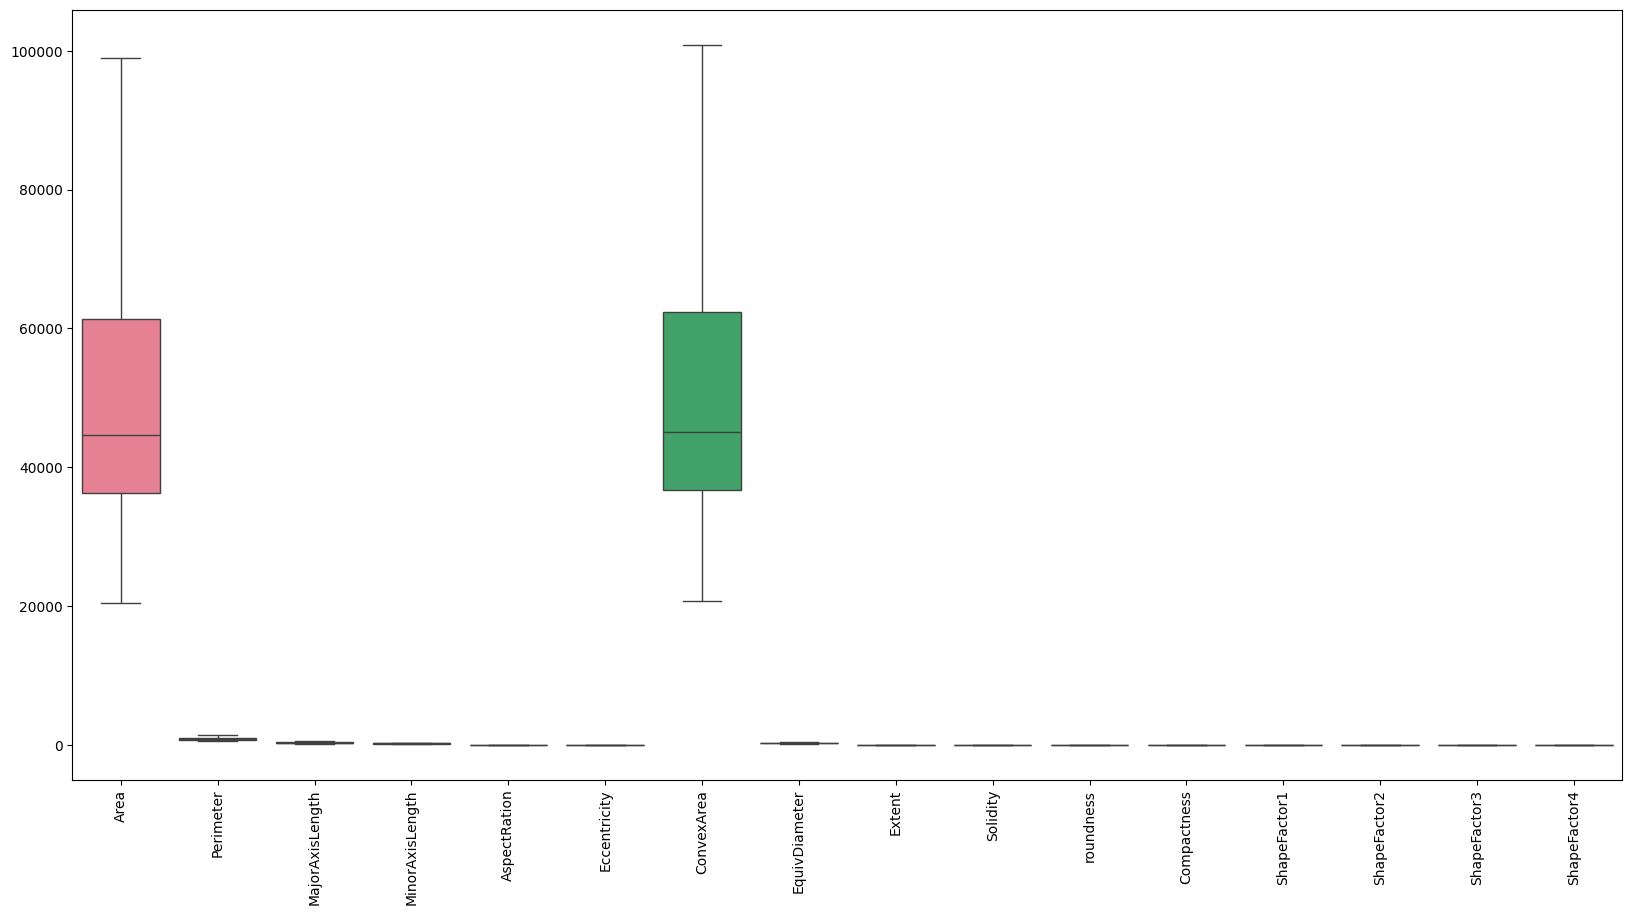

In [43]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = capped_data.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

Now balancing the imbalancing data

In [45]:
# Assuming `class_column` contains the Class column
class_column = Bean_Df_Dup['Class']  # Replace `df` with the dataset containing Class if needed

# Add the 'Class' column to the capped_data DataFrame
capped_data['Class'] = class_column.values


In [47]:
# Separate features and target variable
X = Bean_df.drop('Class', axis=1)
y = Bean_df['Class']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

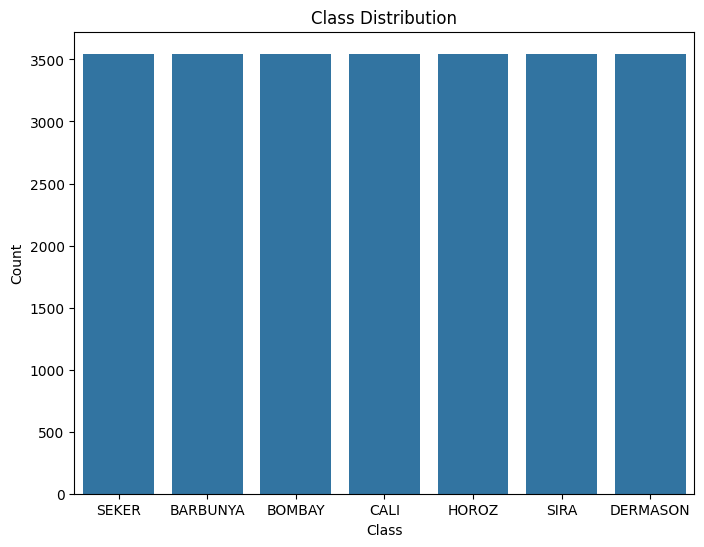

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Class",data=data_resampled)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

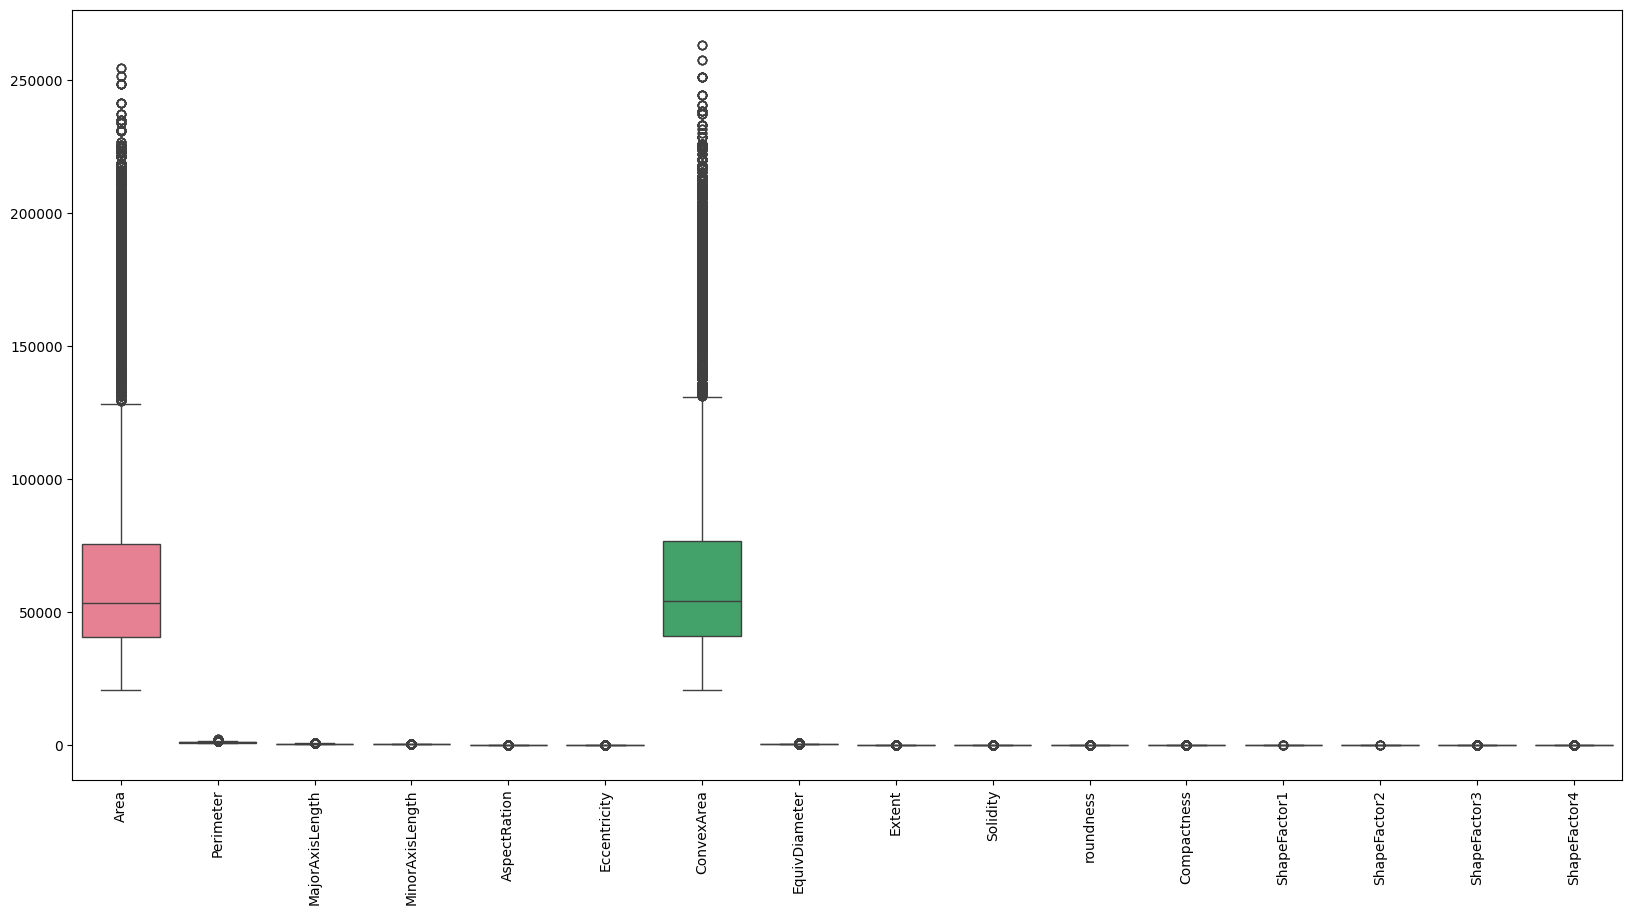

In [49]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = data_resampled.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

In [50]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Separate features and target
X = data_resampled.drop(columns=['Class'])  # Exclude the 'Class' column
y = data_resampled['Class']  # Save the 'Class' column

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% outliers
outliers = iso_forest.fit_predict(X)

# Create a mask for inliers (1) and outliers (-1)
outlier_mask = outliers == -1
print(f"Number of outliers detected: {np.sum(outlier_mask)}")

# Mark outlier rows in the dataset
X['Outlier'] = outlier_mask


Number of outliers detected: 1237


In [51]:
# Calculate the lower and upper bounds (5th and 95th percentiles) for each column in non-outliers
non_outlier_data = X[X['Outlier'] == False]

# Iterate over each feature column to cap outliers
for col in X.columns:
    if col != 'Outlier':  # Skip the 'Outlier' column
        lower_bound = non_outlier_data[col].quantile(0.05)
        upper_bound = non_outlier_data[col].quantile(0.95)

        # Cap outliers
        X.loc[X[col] < lower_bound, col] = lower_bound
        X.loc[X[col] > upper_bound, col] = upper_bound


C:\Users\USER\AppData\Local\Temp\ipykernel_3080\2811045241.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30461.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[X[col] < lower_bound, col] = lower_bound


In [52]:
# Drop the 'Outlier' column
X.drop(columns=['Outlier'], inplace=True)

# Add the 'Class' column back
X['Class'] = y.values


In [53]:
print(X.describe())  # Check summary statistics
print(X.head())      # Check the first few rows of the capped data


                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   24822.000000  24822.000000     24822.000000     24822.000000   
mean    68730.771533    967.425786       360.923525       226.854955   
std     42200.135656    279.710164       106.849271        63.035123   
min     30124.000000    643.805400       231.717655       159.958655   
25%     40348.500000    744.029250       269.292038       184.969253   
50%     53426.500000    911.762000       351.945469       203.603045   
75%     75539.250000   1076.514000       407.859895       242.801901   
max    172359.000000   1591.312000       592.527695       374.269428   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  24822.000000  24822.000000   24822.000000   24822.000000  24822.000000   
mean       1.598010      0.759162   69679.096157     284.789568      0.753660   
std        0.232290      0.082889   42782.128708      80.036843      0.044696   
min        1.217068      0.

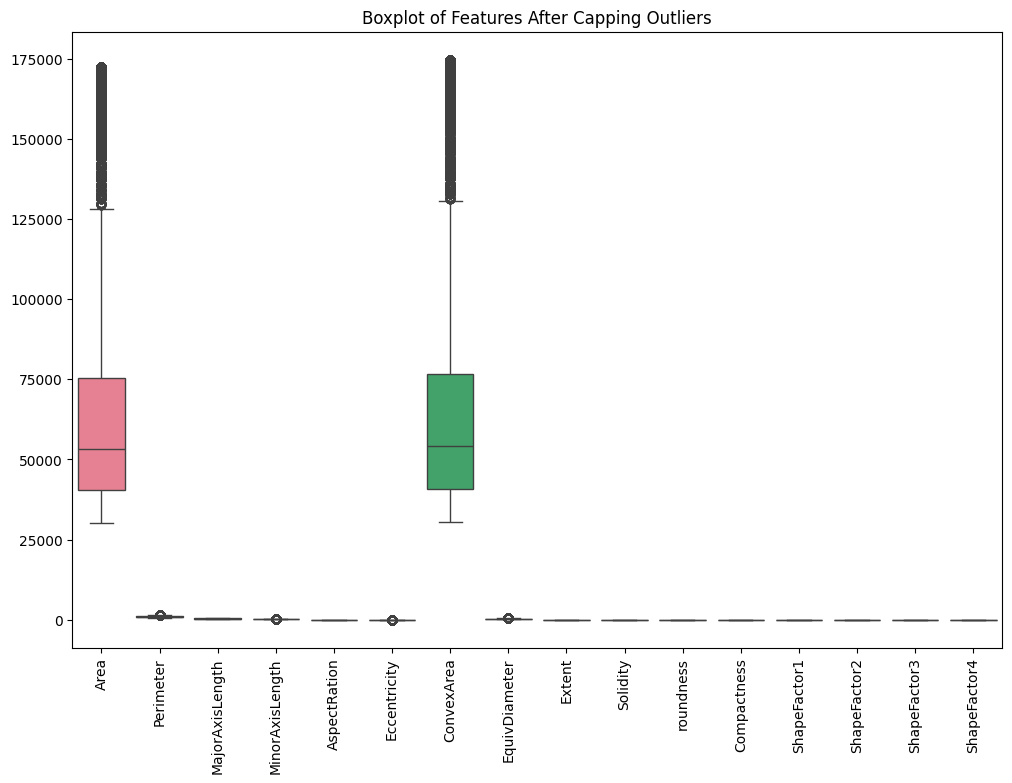

In [54]:
# Plot boxplot for all features after capping
plt.figure(figsize=(12, 8))
sns.boxplot(data=X.drop(columns=['Class']))  # Exclude 'Class' column
plt.title("Boxplot of Features After Capping Outliers")
plt.xticks(rotation=90)
plt.show()


3. Reducing the Multicollinearity Using PCA Technique

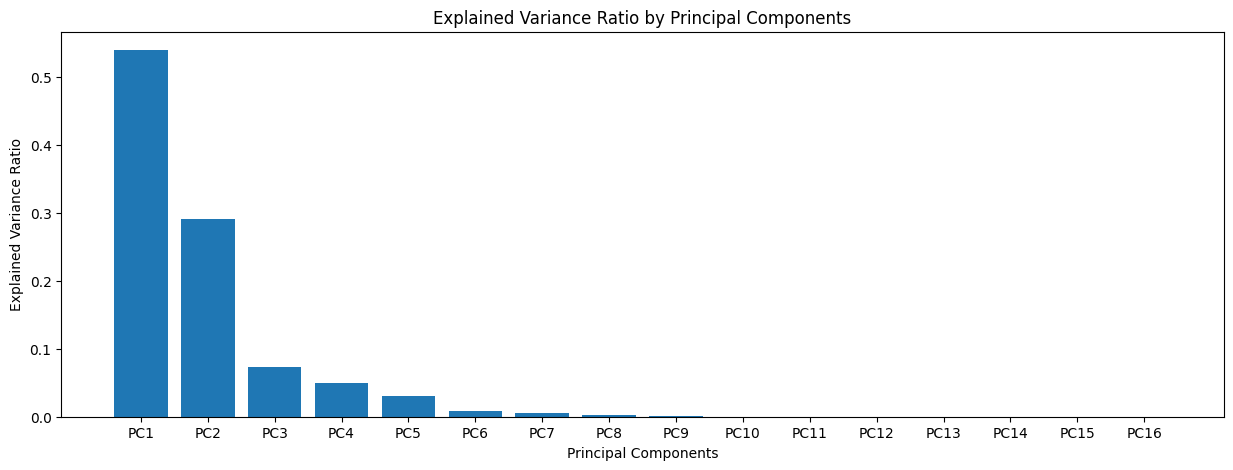

In [57]:
# Exclude 'Class' from capped_data to get the feature matrix
X = X.drop(columns=['Class'])
     
# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit PCA on the standardized data
pca = PCA(random_state=22)
pca.fit(X_scaled)

# Get the loadings and explained variance ratio
loadings = pca.components_

# Number of principal components
num_pc = pca.n_components_

# Create a list for PC labels (PC1, PC2, ..., PCn)
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Step 3: Plot the explained variance ratio for each principal component
f, ax = plt.subplots(figsize=(15, 5))
plt.bar(x=pc_list, height=pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()


In [59]:
# Fit PCA with the first 10 principal components
pca = PCA(n_components=9, random_state=22)
X_pca = pca.fit_transform(X_scaled)  # X_scaled is the standardized data (excluding 'Class')

# Create a DataFrame using the first 10 principal components
pc_columns = ["PC" + str(i) for i in range(1, 10)]
df_pca = pd.DataFrame(X_pca, columns=pc_columns)

# Optionally, add the 'Class' column back to the DataFrame if you need it for classification
df_pca['Class'] = capped_data['Class'].values

# Display the first few rows of the new DataFrame
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -5.065162 -2.111773 -0.560013 -0.182854 -0.201120  0.148952  0.396668   
1 -4.547461 -1.843168 -1.564583  0.351257  0.808643 -0.159195  0.616421   
2 -5.040173 -2.194825 -0.382517  0.057429 -0.012064 -0.028140  0.453766   
3 -4.140665 -1.542092 -3.276147  0.926579  0.152023  0.428474  0.401194   
4 -4.956956 -2.454921 -0.135372 -0.131033 -0.176639 -0.231796  0.202508   

        PC8       PC9  
0  0.330871 -0.356137  
1  0.200494 -0.186705  
2  0.263921 -0.309485  
3  0.490793 -0.271265  
4  0.340343 -0.082989  


Now, our dataset is scaled and all the features are independent.

7. **Feature Engineering:**
     In the dataset, the features are all numerical values except target column.

8. **Feature Selection:**
       According to the nature of this dataset, it shows highcorrelation between the independent features. So, here I have already used the PCA methods to reduce the correlation among them and create the dataframe using 10 components that explained the total variance.

9. **Split Data into Training and Testing Sets:**
    - Divide the dataset into training and testing subsets.

In [65]:
# Assuming 'data_resampled' is the dataset that still contains the 'Class' column
df_pca['Class'] = data_resampled['Class'].values

In [ ]:
# Define features (first  principal components) and the target (Class)
X = df_pca.drop('Class', axis=1)  # Features are the 9 principal components
y = df_pca['Class']               # Target is the Class column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

10. **Feature Scaling:**
        To apply the PCA, we need to Standardise the data.
    So, that we already done in the previous step.

11. **Model Building:**

The following are the algorithms I have using the prediction.
1. Logistic Regression (LogisticRegression)
2. Support Vector Machine (SVC)
3. Random Forest Classifier (RandomForestClassifier)
4. K-Nearest Neighbors (KNeighborsClassifier)
5. Gradient Boosting Classifier (GradientBoostingClassifier)

In [77]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [78]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Store results
results = {}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    }


In [80]:
# Print results
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")


Logistic Regression - Accuracy: 0.9358, Precision: 0.9361, F1 Score: 0.9359
SVC - Accuracy: 0.9441, Precision: 0.9444, F1 Score: 0.9442
Random Forest - Accuracy: 0.9678, Precision: 0.9678, F1 Score: 0.9678
KNN - Accuracy: 0.9373, Precision: 0.9372, F1 Score: 0.9372
Gradient Boosting - Accuracy: 0.9492, Precision: 0.9493, F1 Score: 0.9493


In [81]:
# Determine the best model based on F1 score
best_model = max(results.items(), key=lambda x: x[1]['F1 Score'])
print(f"Best Model: {best_model[0]} with F1 Score: {best_model[1]['F1 Score']:.4f}")


Best Model: Random Forest with F1 Score: 0.9678


13. **Hyperparameter Tuning:**
    

 - After analyzing the scores, the data shows a good accuracy. And the best model is acciording to the ML Algorithm is 
RandomForestClassifier.

14. **Save the Model:**
    - Save the trained model for future use.

In [86]:
import joblib

In [87]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # Train the model

RandomForestClassifier()

In [88]:
joblib.dump(rf_model, 'random_forest_classifier.joblib')

['random_forest_classifier.joblib']

15. **Test with Unseen Data:**
    - Assess the model's performance on unseen data.

In [94]:
df = pd.read_excel("Dry_Been_Unseendata.xlsx")

In [95]:
df

,Area,Perimeter,MajorAxislength,MinorAxisLength,Equivalent Diameter,AspectRatio,Eccentricity,ConvexArea,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,24654.0,799,235,135,177.218423,1.740741,0.35,26000.0,0.65,0.948231,0.485047,0.754121,0.009532,0.005476,0.568698,0.032083
1,24960.0,755,245,160,178.314829,1.531250,0.45,24711.8,0.63,1.010044,0.549972,0.727816,0.009816,0.006410,0.529716,0.024535
2,24470.0,724,256,150,176.555868,1.706667,0.43,24565.0,0.64,0.996133,0.586336,0.689671,0.010462,0.006130,0.475647,0.024018
3,23735.0,635,345,145,173.884067,2.379310,0.55,24700.0,0.68,0.960931,0.739318,0.504012,0.014535,0.006109,0.254028,0.016170
4,23643.0,644,350,132,173.546741,2.651515,0.65,23645.0,0.71,0.999915,0.716012,0.495848,0.014804,0.005583,0.245865,0.017757
5,23318.3,710,360,200,172.350923,1.800000,0.48,24520.4,0.72,0.950976,0.580992,0.478753,0.015439,0.008577,0.229204,0.012562
6,22993.6,785,410,245,171.146750,1.673469,0.52,24711.8,0.52,0.930470,0.468659,0.417431,0.017831,0.010655,0.174249,0.009955
7,22668.9,795,425,265,169.934045,1.603774,0.42,24711.8,0.55,0.917331,0.450491,0.399845,0.018748,0.011690,0.159876,0.008992
8,22344.2,650,450,275,168.712623,1.636364,0.32,25094.6,0.59,0.890399,0.664244,0.374917,0.020139,0.012307,0.140563,0.006691
9,23000.0,632,460,250,171.170567,1.840000,0.36,25286.0,0.79,0.909594,0.723241,0.372110,0.020000,0.010870,0.138466,0.007001


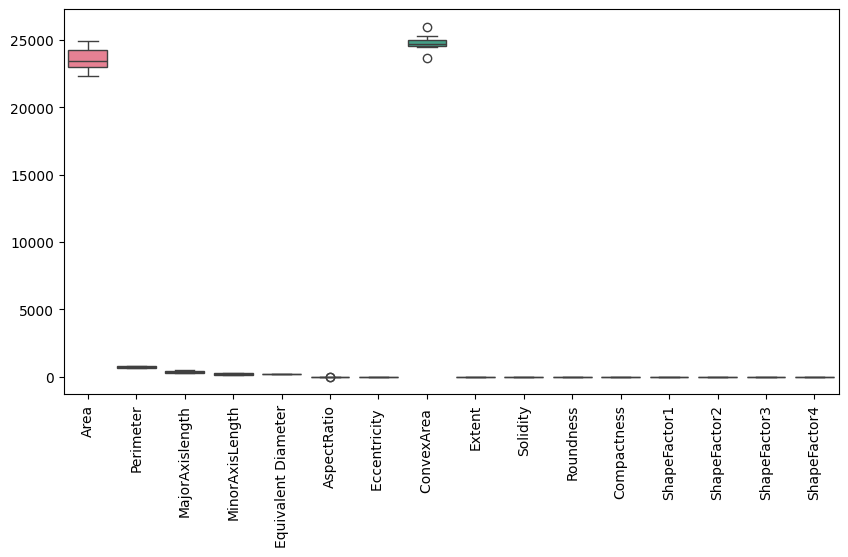

In [96]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (10,5))
sns.boxplot(data = df.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

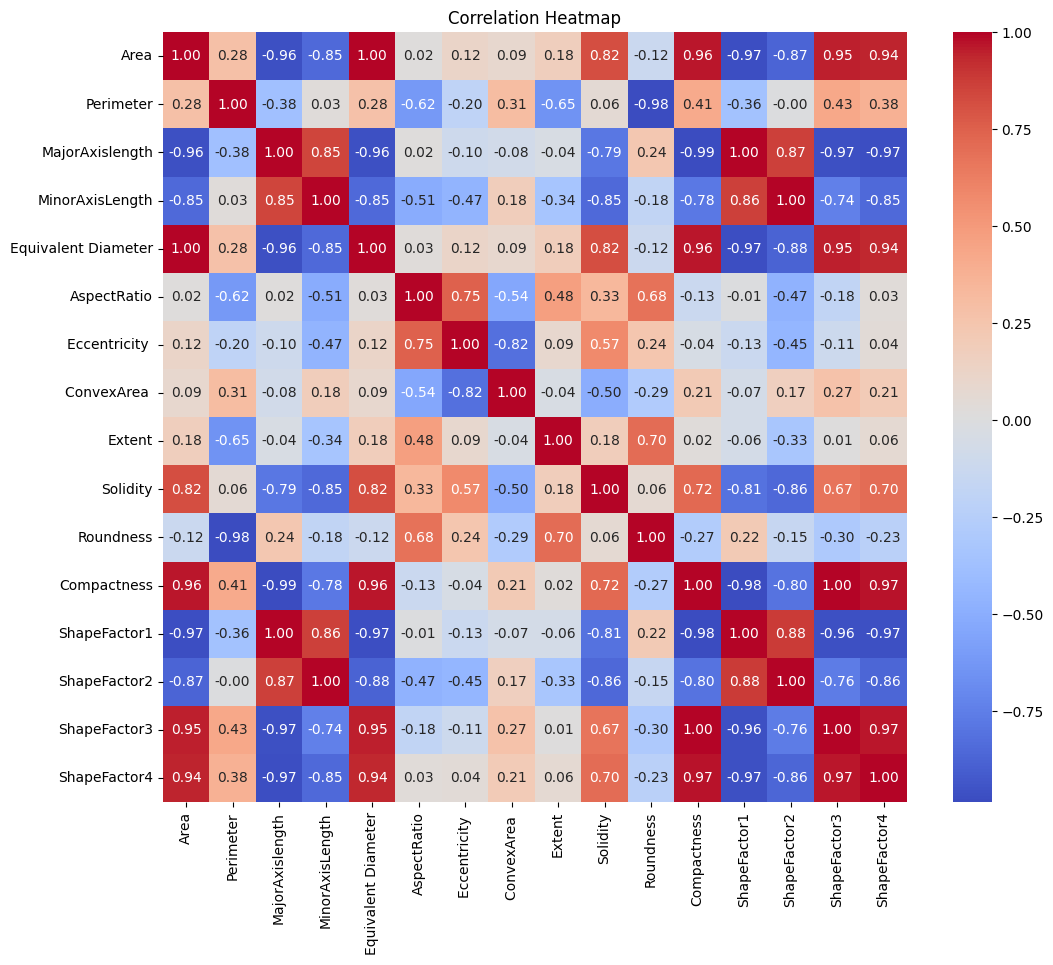

In [97]:
corr_matrix = df.corr()
corr_matrix
# Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [98]:
# Exclude 'Class' from capped_data to get the feature matrix
X = df

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

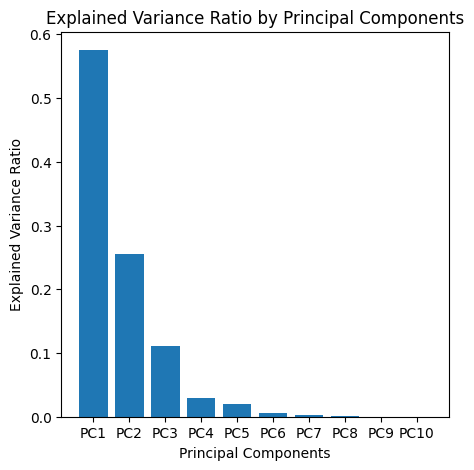

In [99]:
# Step 2: Fit PCA on the standardized data
pca = PCA(random_state=22)
pca.fit(X_scaled)

# Get the loadings and explained variance ratio
loadings = pca.components_

# Number of principal components
num_pc = pca.n_components_

# Create a list for PC labels (PC1, PC2, ..., PCn)
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Step 3: Plot the explained variance ratio for each principal component
f, ax = plt.subplots(figsize=(5, 5))
plt.bar(x=pc_list, height=pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [110]:
# Fit PCA with the first 10 principal components
pca = PCA(n_components=9, random_state=22)
X_pca = pca.fit_transform(X_scaled)  

# Create a DataFrame using the first 10 principal components
pc_columns = ["PC" + str(i) for i in range(1, 10)]
df_pca = pd.DataFrame(X_pca, columns=pc_columns)

# Display the first few rows of the new DataFrame
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -4.238089 -2.581085  1.383809  1.315285  0.193953 -0.151634  0.050027   
1 -4.105367 -1.042069 -0.267567 -1.151878 -0.116099  0.373044  0.103531   
2 -3.350499 -0.315741 -0.036796 -0.786807 -0.381665 -0.277455 -0.049741   
3 -0.667474  2.656768  0.370435  0.743798 -0.533986  0.372749 -0.208520   
4 -1.121196  4.224934 -1.244440  0.282551  0.071658 -0.282351  0.249749   

        PC8       PC9  
0  0.041418 -0.002193  
1  0.028498 -0.037228  
2 -0.070921  0.052173  
3 -0.112682 -0.012824  
4  0.070959 -0.001853  


In [105]:
# Load the trained Random Forest model
model = joblib.load('random_forest_classifier.joblib') 

In [111]:
# Make predictions on unseen data
predictions = model.predict(df_pca)


In [112]:
predictions

array(['SEKER', 'DERMASON', 'DERMASON', 'SIRA', 'HOROZ', 'BARBUNYA',
       'CALI', 'BARBUNYA', 'BOMBAY', 'BARBUNYA'], dtype=object)

16. **Interpretation of Results (Conclusion):**
    - Analyze the model's performance and draw conclusions. Discuss any limitations of the dataset.

The provided unseen data is predicted according to the given classifier. And it is felt like while applying the resampling tehnique, overfitting is caused. So, it is crusial to check that also.

17. **Future Work:**
    - Explore deep learning algorithms for potentially higher accuracy.
    - Update the model periodically with new data.
    - Address imbalanced data through resampling techniques.
    - Consider adding more features to enhance predictive power.

Thus this dataset having the imbalanced datastructure,  I have already applied the resampling technique, because to accurate the 
prediction.

And will try to apply deep learning algorithms for improving the accuracy.